In [252]:
import numpy as np
from importlib import reload
import mixture_model
reload(mixture_model)
from mixture_model import MixtureModel
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import visualization
import timeit
import pickle
from numpy.random import multivariate_normal
from scipy.stats import multivariate_normal as mn
from sklearn.metrics import roc_curve, roc_auc_score

# 1. 
Реализовать ЕМ-алгоритм для восстановления смеси многомерных нормальных распределений согласно заданному прототипу. Требования по эффективности реализации: среднее время одной ЕМ-итерации для N = 10000 объектов, D = 100 признаков и K = 10 компонент смеси не должно превышать одной секунды.

In [250]:
model = MixtureModel(n_components=10)

In [251]:
%time model.EM_fit(max_iter=1, data=np.random.normal(size=(10000, 100)), trace=True)[-1]

one iteration: 0.48675070190802217
CPU times: user 1.99 s, sys: 320 ms, total: 2.31 s
Wall time: 1.19 s


[-360436.53389117145, -360436.53389117145]

# 2. 
Провести тестирование реализованного ЕМ-алгоритма на двумерных модельных данных. Для этого сгене- рировать данные из смеси распределений с заданными параметрами, а затем восстановить по этим данным параметры смеси с помощью ЕМ-алгоритма. Отобразить результат восстановления, где объекты выборки, соответствующие одинаковым компонентам смеси, показаны одинаковыми цветами. Убедиться в том, что значение правдоподобия в ЕМ-итерациях монотонно не убывает.

In [356]:
data = np.concatenate((multivariate_normal([20, 70], [[200, 20], [20, 200]], 200),
                      multivariate_normal([42, 200], [[200, 120], [120, 600]], 200),
                      multivariate_normal([0, 150], [[100, 40], [40, 70]], 200)))


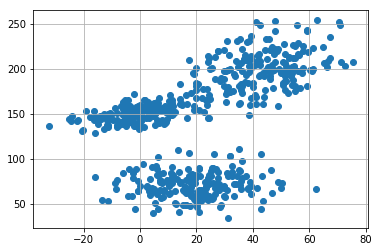

In [357]:
plt.scatter(data[:, 0], data[:, 1])
plt.grid(True)
#plt.savefig('new2.pdf', bbox_inches='tight')

In [328]:
model = MixtureModel(n_components=3)

In [329]:
np.random.shuffle(data)
res = model.EM_with_different_initials(max_iter=100, data=data, n_starts=100)
#res = model.EM_fit(data=data, trace=True)

In [330]:
#res

In [331]:
labels = model.predict(data=data)

In [332]:
#labels

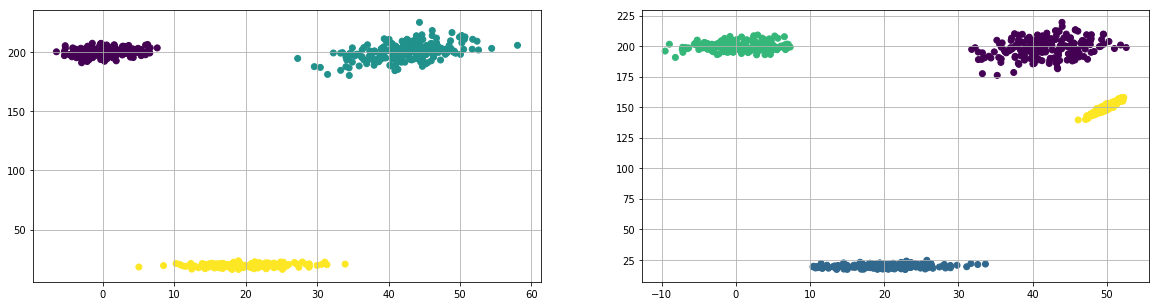

In [333]:
fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(5)

plt.subplot(1, 2, 1)
plt.grid(True)
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.subplot(1, 2, 2)
plt.scatter(data_2[:, 0], data_2[:, 1], c=labels_2)
#plt.scatter(data[:, 0], data[:, 1])
plt.grid(True)
plt.savefig('exp2_non_sep.pdf', bbox_inches='tight')

In [423]:
data_2 = np.concatenate((multivariate_normal([10, 80], [[200, 10], [10, 60]], 100),
                      multivariate_normal([42, 190], [[300, 12], [12, 60]], 100),
                      multivariate_normal([0, 150], [[100, 40], [40, 150]], 100),
                      multivariate_normal([50, 130], [[190, 30], [30, 170]], 200)))

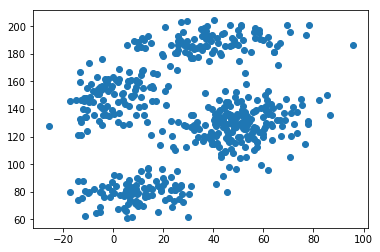

In [424]:
plt.scatter(data_2[:, 0], data_2[:, 1])

In [425]:
model = MixtureModel(n_components=4)

In [438]:
np.random.shuffle(data)
res = model.EM_with_different_initials(max_iter=100, data=data_2, n_starts=100)
#res = model.EM_fit(data=data, trace=True)

In [439]:
labels_5 = model.predict(data=data_2)

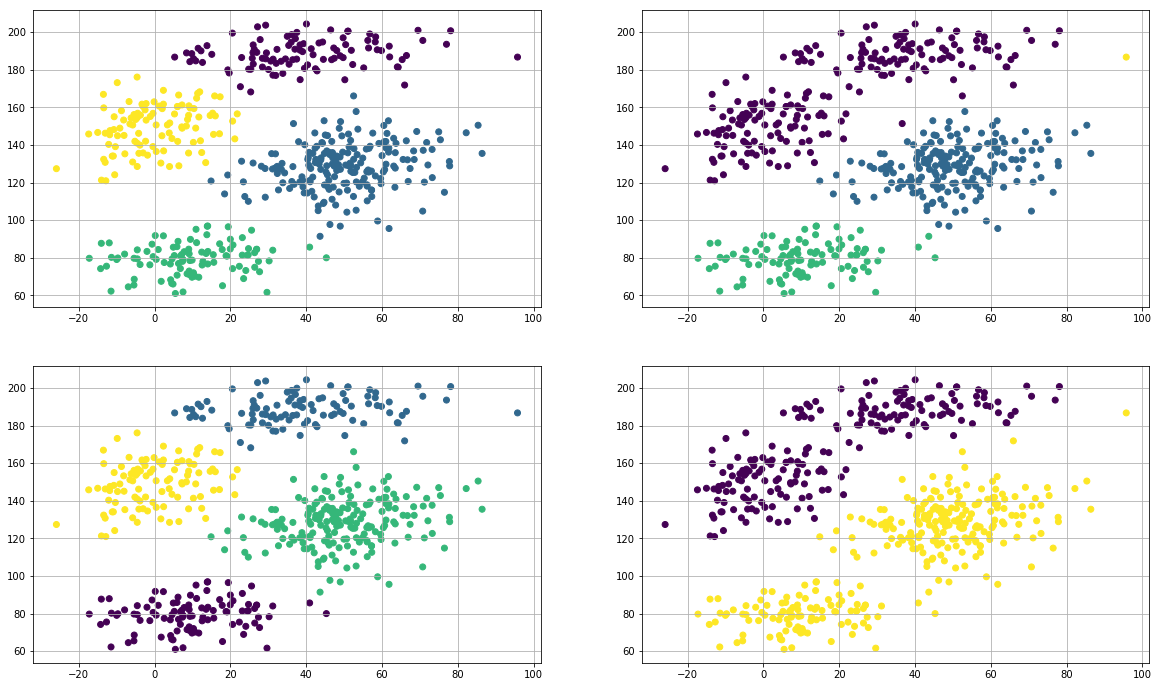

In [444]:
fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(12)

plt.subplot(2, 2, 1)
plt.grid(True)
plt.scatter(data_2[:, 0], data_2[:, 1], c=labels_3)
plt.subplot(2, 2, 2)
plt.scatter(data_2[:, 0], data_2[:, 1], c=labels_2)
#plt.scatter(data[:, 0], data[:, 1])
plt.grid(True)

plt.subplot(2, 2, 3)
plt.scatter(data_2[:, 0], data_2[:, 1], c=labels_4)
#plt.scatter(data[:, 0], data[:, 1])
plt.grid(True)

plt.subplot(2, 2, 4)
plt.scatter(data_2[:, 0], data_2[:, 1], c=labels_5)
#plt.scatter(data[:, 0], data[:, 1])
plt.grid(True)
plt.savefig('exp2_non_sep.pdf', bbox_inches='tight')





# 3. 
Реализовать оценку модели фона с помощью одномерной гауссианы и протестировать на последовательно- сти pedestrians. Проанализировать качество вычитания фона с помощью трёх инструментов, описанных выше.

In [20]:
from JSAnimation import IPython_display

In [21]:
from PIL import Image
train_data = []
for i in range(1, 300):
    train_data.append(np.array(Image.open('./pedestrians/input/in{id:06d}.jpg'.format(id=i))))
#imgs = np.array(imgs)

In [22]:
train_masks = []
for i in range(1, 300):
    train_masks.append(np.array(Image.open('./pedestrians/groundtruth/gt{id:06d}.png'.format(id=i))))
#masks = np.array(masks)

In [23]:
test_masks = []
for i in range(300, 1100):
    test_masks.append(np.array(Image.open('./pedestrians/groundtruth/gt{id:06d}.png'.format(id=i))))
#masks = np.array(masks)

In [24]:
test_data = []
for i in range(300, 1100):
    test_data.append(np.array(Image.open('./pedestrians/input/in{id:06d}.jpg'.format(id=i))))



In [25]:
train_data_grey = (np.array(train_data) * np.array([0.2126, 0.7152, 0.0722])).sum(axis=3)

In [26]:
train_data_grey = train_data_grey.reshape(299, -1)

In [27]:
train_data_grey.shape

(299, 86400)

In [10]:
model = MixtureModel(n_components=1)

In [223]:
#start_time = timeit.default_timer()
        
#res = np.empty((86400, 2))
#for pixel in range(86400):
#    if pixel % 10000 == 0:
#        print (pixel)
#    _, tmp_mean, tmp_conv = model.EM_with_different_initials(data=train_data_grey[:, pixel][:, np.newaxis], n_starts=3)
#    res[pixel] = tmp_mean.ravel(), tmp_conv.ravel()
#print(timeit.default_timer() - start_time)


In [269]:
#with open('exp_3_res.pickle', 'wb') as f:
    #pickle.dump(res, f)

In [28]:
with open('exp_3_res.pickle', 'rb') as f:
    res = pickle.load(f)

In [224]:
#res

In [30]:
means = res[:, 0]
covs = res[:, 1]
means.shape, covs.shape

((86400,), (86400,))

In [31]:
test_data_grey = (np.array(test_data) * np.array([0.2126, 0.7152, 0.0722])).sum(axis=3)
test_data_grey = test_data_grey.reshape(800, -1)
test_data_grey.shape

(800, 86400)

In [477]:
k = 1
sigmas = covs ** 0.5
sigmas.shape

(86400,)

In [478]:
answers_3_1 = np.abs(test_data_grey - means.T) > k * sigmas.T
answers_3_1.shape

(800, 86400)

In [479]:
test_masks = np.array(test_masks).reshape(800, -1)
test_masks.shape

(800, 86400)

In [480]:
FN_3_1 = np.bitwise_and(1 - test_masks, answers_3_1).sum(axis=1)
#FN

In [481]:
FP_3_1 = np.bitwise_and(test_masks, 1 - answers_3_1).sum(axis=1)
#FP

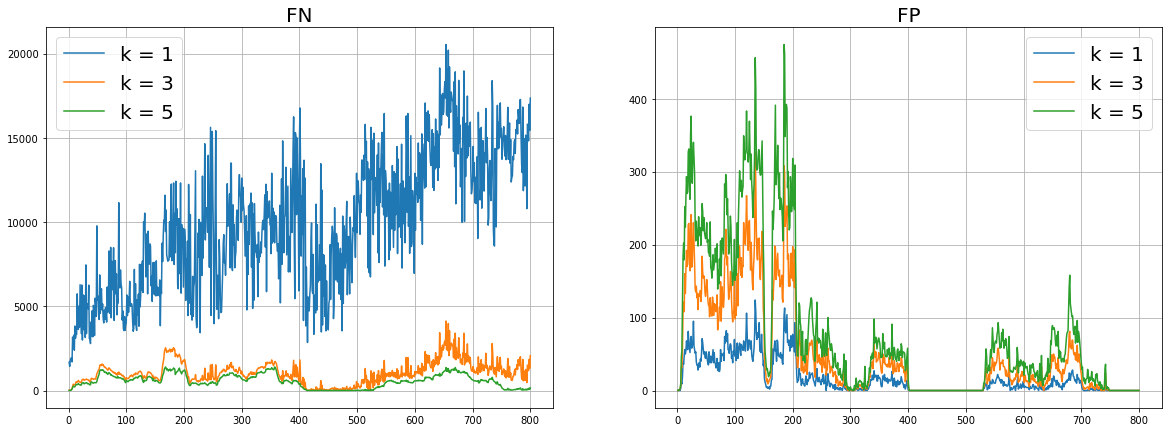

In [497]:
fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(7)
  
plt.subplot(1, 2, 1)
plt.grid(True)
plt.title("FN", fontsize=20)
plt.plot(range(1, 801), FN_3_1)
plt.plot(range(1, 801), FN_3)
plt.plot(range(1, 801), FN_3_5)
plt.legend(['k = 1', 'k = 3', 'k = 5'], fontsize=20)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.title("FP", fontsize=20)
plt.plot(range(1, 801), FP_3_1)
plt.plot(range(1, 801), FP_3)
plt.plot(range(1, 801), FP_3_5)
plt.legend(['k = 1', 'k = 3', 'k = 5'], fontsize=20)

plt.savefig('exp3_FN_FP.pdf', bbox_inches='tight')



In [38]:
answer_images = answers.reshape(800, 240, 360)

In [39]:
images_with_masks_3 = []
for i in range(800):
    images_with_masks_3.append(visualization.highlight_mask(image=test_data[i], mask=answer_images[i]))

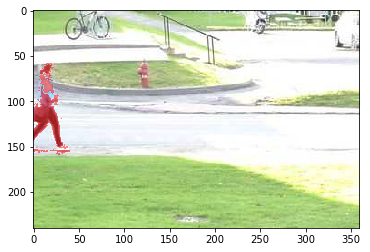

In [446]:
plt.imshow(Image.fromarray(images_with_masks_3[14]))
plt.savefig('exp3_good.pdf', bbox_inches='tight')


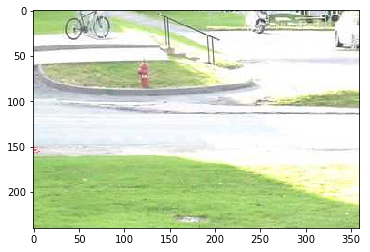

In [41]:
video = visualization.make_video(frames=np.array(test_data), masks=np.array(answer_images))

In [43]:
#video()

In [89]:
test_masks.astype(bool).ravel().shape

(69120000,)

In [104]:
answers.astype(bool).ravel().shape

(69120000,)

In [103]:
np.abs(test_data_grey - means.T).astype(bool).ravel().shape

(69120000,)

In [225]:
#roc_curves_3 = []
#for i in range(800):
#    y_true = 1 - test_masks[i].astype(bool).ravel()
#    if y_true.all():
#        y_true[-1] = False
#    elif not y_true.any():
#        y_true[-1] = True
#    #print(y_true.all())
#    #print(y_true.any())
#    roc_curves_3.append(roc_curve(y_true=y_true, 
#                                      y_score=1 - np.abs(test_data_grey - means.T)[i].ravel()))
#    if i % 100 == 0:
#        print(i)

In [138]:
#with open('roc_curves_3.pickle', 'wb') as f:
    #pickle.dump(roc_curves_3, f)

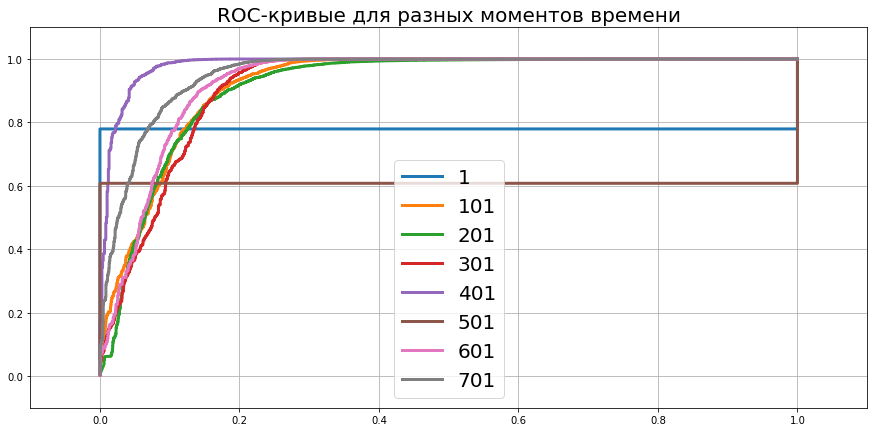

In [492]:
fig, ax = plt.subplots()

fig.set_figwidth(15)
fig.set_figheight(7)

for i in range(1, 800, 100):
    #plt.subplot(4, 2, i // 100 + 1)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-0.1, 1.1)
    plt.grid(True)
    plt.plot(roc_curves_3[i][0], roc_curves_3[i][1], linewidth=3)
plt.legend(range(1, 800, 100), fontsize=20)
plt.title('ROC-кривые для разных моментов времени', fontsize=20)
plt.savefig('exp3_roc.pdf', bbox_inches='tight')




In [226]:
#np.abs(test_data_grey - means.T)[i].ravel()

In [227]:
#roc_aucs_3 = []
#for i in range(800):
#    y_true = 1 - test_masks[i].astype(bool).ravel()
#    if y_true.all():
#        y_true[-1] = False
#    elif not y_true.any():
#        y_true[-1] = True
#    
#    roc_aucs_3.append(roc_auc_score(y_true=y_true, 
#                                      y_score=1 - np.abs(test_data_grey - means.T)[i].ravel()))
#    if i % 100 == 0:
#        print(i)

In [141]:
#with open('roc_aucs_3.pickle', 'wb') as f:
    #pickle.dump(roc_aucs_3, f)

In [152]:
np.arange(len(roc_aucs_3))[np.array(roc_aucs_3) < 0.2]

array([436, 500, 511, 523, 760, 771, 782, 786, 797])

In [453]:
np.argmax(np.array(roc_aucs_3)), np.argmin(np.array(roc_aucs_3))

(401, 786)

In [454]:
roc_aucs_3[401], roc_aucs_3[786]

(0.98392430235304085, 0.11733932105695667)

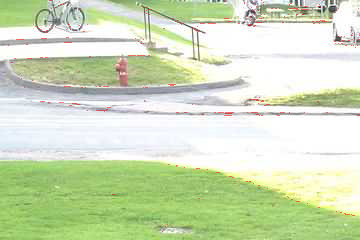

In [153]:
Image.fromarray(images_with_masks_3[436])

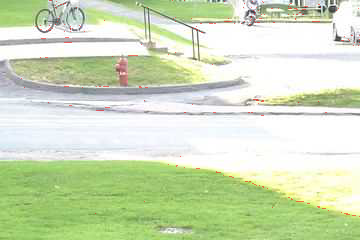

In [154]:
Image.fromarray(images_with_masks_3[500])

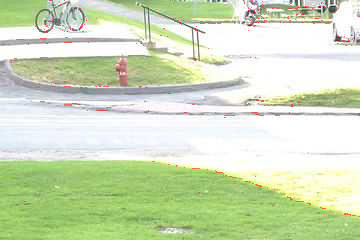

In [155]:
Image.fromarray(images_with_masks_3[511])

401 786
0.983924302353 [0.11733932105695667]


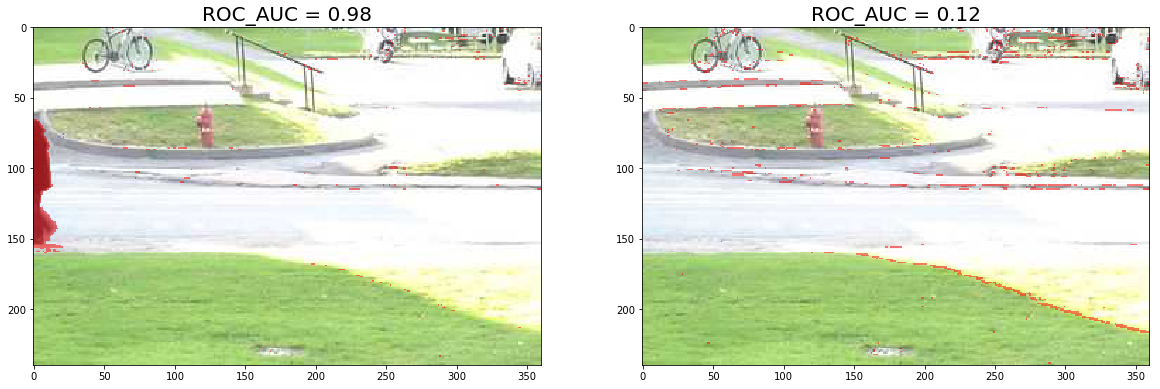

In [508]:
i, j = np.argmax(np.array(roc_aucs_3)), np.argmin(np.array(roc_aucs_3))
print(i, j)
print(roc_aucs_3[i], [roc_aucs_3[j]])
fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(7)

plt.subplot(1, 2, 1)
plt.title('ROC_AUC = 0.98', fontsize=20)
plt.imshow(Image.fromarray(images_with_masks_3[i]))

plt.subplot(1, 2, 2)
plt.title('ROC_AUC = 0.12', fontsize=20)
plt.imshow(Image.fromarray(images_with_masks_3[j]))

plt.savefig('exp3_good_and_bad.pdf', bbox_inches='tight')



# 4. 
Реализовать оценку модели фона с помощью многомерной гауссианы в цветовом пространстве RGB и про- тестировать результат на последовательности pedestrians. Проанализировать ошибки метода и сравнить его с остальными.


In [44]:
train_data_rgb = np.array(train_data).reshape(299, -1, 3)

In [45]:
model_rgb = MixtureModel(n_components=1)

In [228]:
#start_time = timeit.default_timer()
        
#res_means = np.empty((86400, 3))
#res_covs = np.empty((86400, 3, 3))
#for pixel in range(86400):
#    if pixel % 10000 == 0:
#        print (pixel)
#    _, tmp_mean, tmp_conv = model_rgb.EM_with_different_initials(data=train_data_rgb[:, pixel], n_starts=2)
#    res_means[pixel] = tmp_mean
#    res_covs[pixel] = tmp_conv
#print(timeit.default_timer() - start_time)

In [190]:
'''
with open('exp_4_res_means.pickle', 'wb') as f:
    pickle.dump(res_means, f)
with open('exp_4_res_covs.pickle', 'wb') as f:
    pickle.dump(res_covs, f)
'''

In [47]:
with open('exp_4_res_means.pickle', 'rb') as f:
    res_means = pickle.load(f)
with open('exp_4_res_covs.pickle', 'rb') as f:
    res_covs = pickle.load(f)

In [48]:
res_means.shape, res_covs.shape

(86400, 3)

In [50]:
test_data_rgb = np.array(test_data).reshape(800, -1, 3)
test_data_rgb.shape

In [53]:
densities_4 = []
for i in range(86400):
    densities_4.append(mn.pdf(x=test_data_rgb[:, i], mean=res_means[i], cov=res_covs[i]))

In [229]:
#train_densities_4 = []
#for i in range(86400):
#    train_densities_4.append(mn.pdf(x=train_data_rgb[:, i], mean=res_means[i], cov=res_covs[i]))


In [54]:
answers_4 = (np.array(densities_4).T < 1e-12)

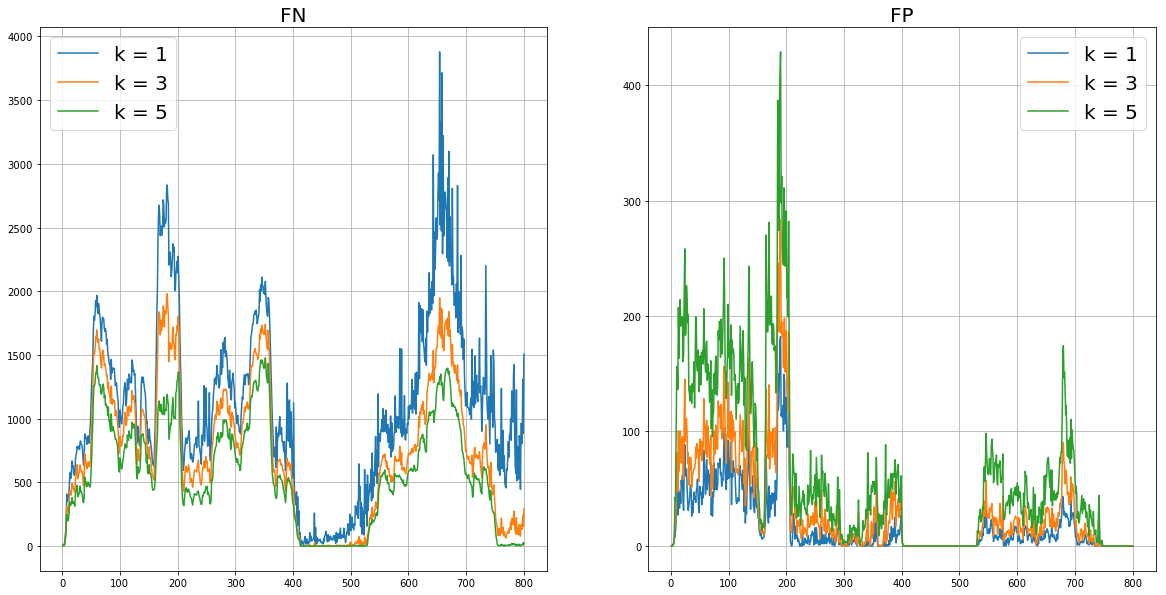

In [494]:
answers_4 = (np.array(densities_4).T < 1e-12)

FN_4 = np.bitwise_and(1 - test_masks,  answers_4).sum(axis=1)
#FN
FP_4 = np.bitwise_and(test_masks,  1 - answers_4).sum(axis=1)

answers_4_1 = (np.array(densities_4).T < 1e-8)

FN_4_1 = np.bitwise_and(1 - test_masks,  answers_4_1).sum(axis=1)
#FN
FP_4_1 = np.bitwise_and(test_masks,  1 - answers_4_1).sum(axis=1)


answers_4_5 = (np.array(densities_4).T < 1e-20)

FN_4_5 = np.bitwise_and(1 - test_masks,  answers_4_5).sum(axis=1)
#FN
FP_4_5 = np.bitwise_and(test_masks,  1 - answers_4_5).sum(axis=1)







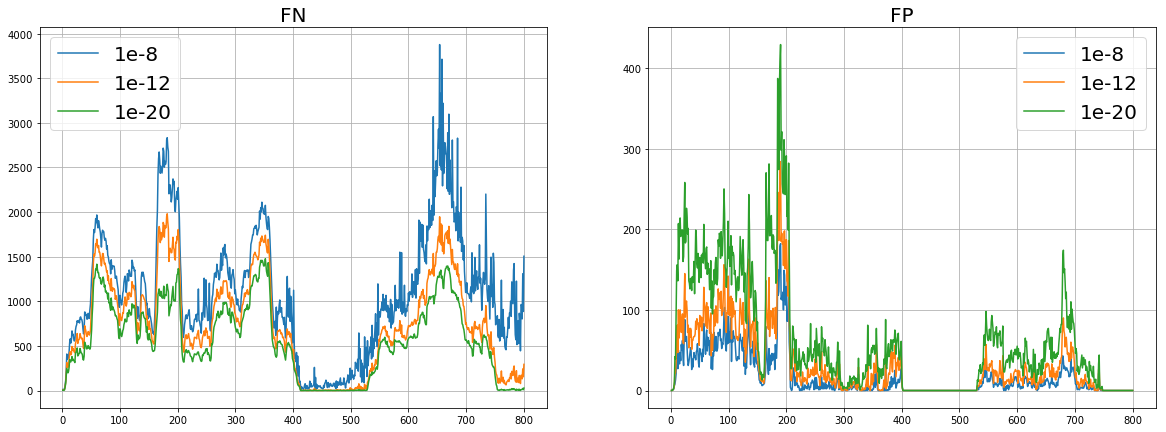

In [498]:

fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(7)
  
plt.subplot(1, 2, 1)
plt.grid(True)
plt.title("FN", fontsize=20)
plt.plot(range(1, 801), FN_4_1)
plt.plot(range(1, 801), FN_4)
plt.plot(range(1, 801), FN_4_5)
plt.legend(['1e-8', '1e-12', '1e-20'], fontsize=20)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.title("FP", fontsize=20)
plt.plot(range(1, 801), FP_4_1)
plt.plot(range(1, 801), FP_4)
plt.plot(range(1, 801), FP_4_5)
plt.legend(['1e-8', '1e-12', '1e-20'], fontsize=20)

plt.savefig('exp4_FN_FP.pdf', bbox_inches='tight')


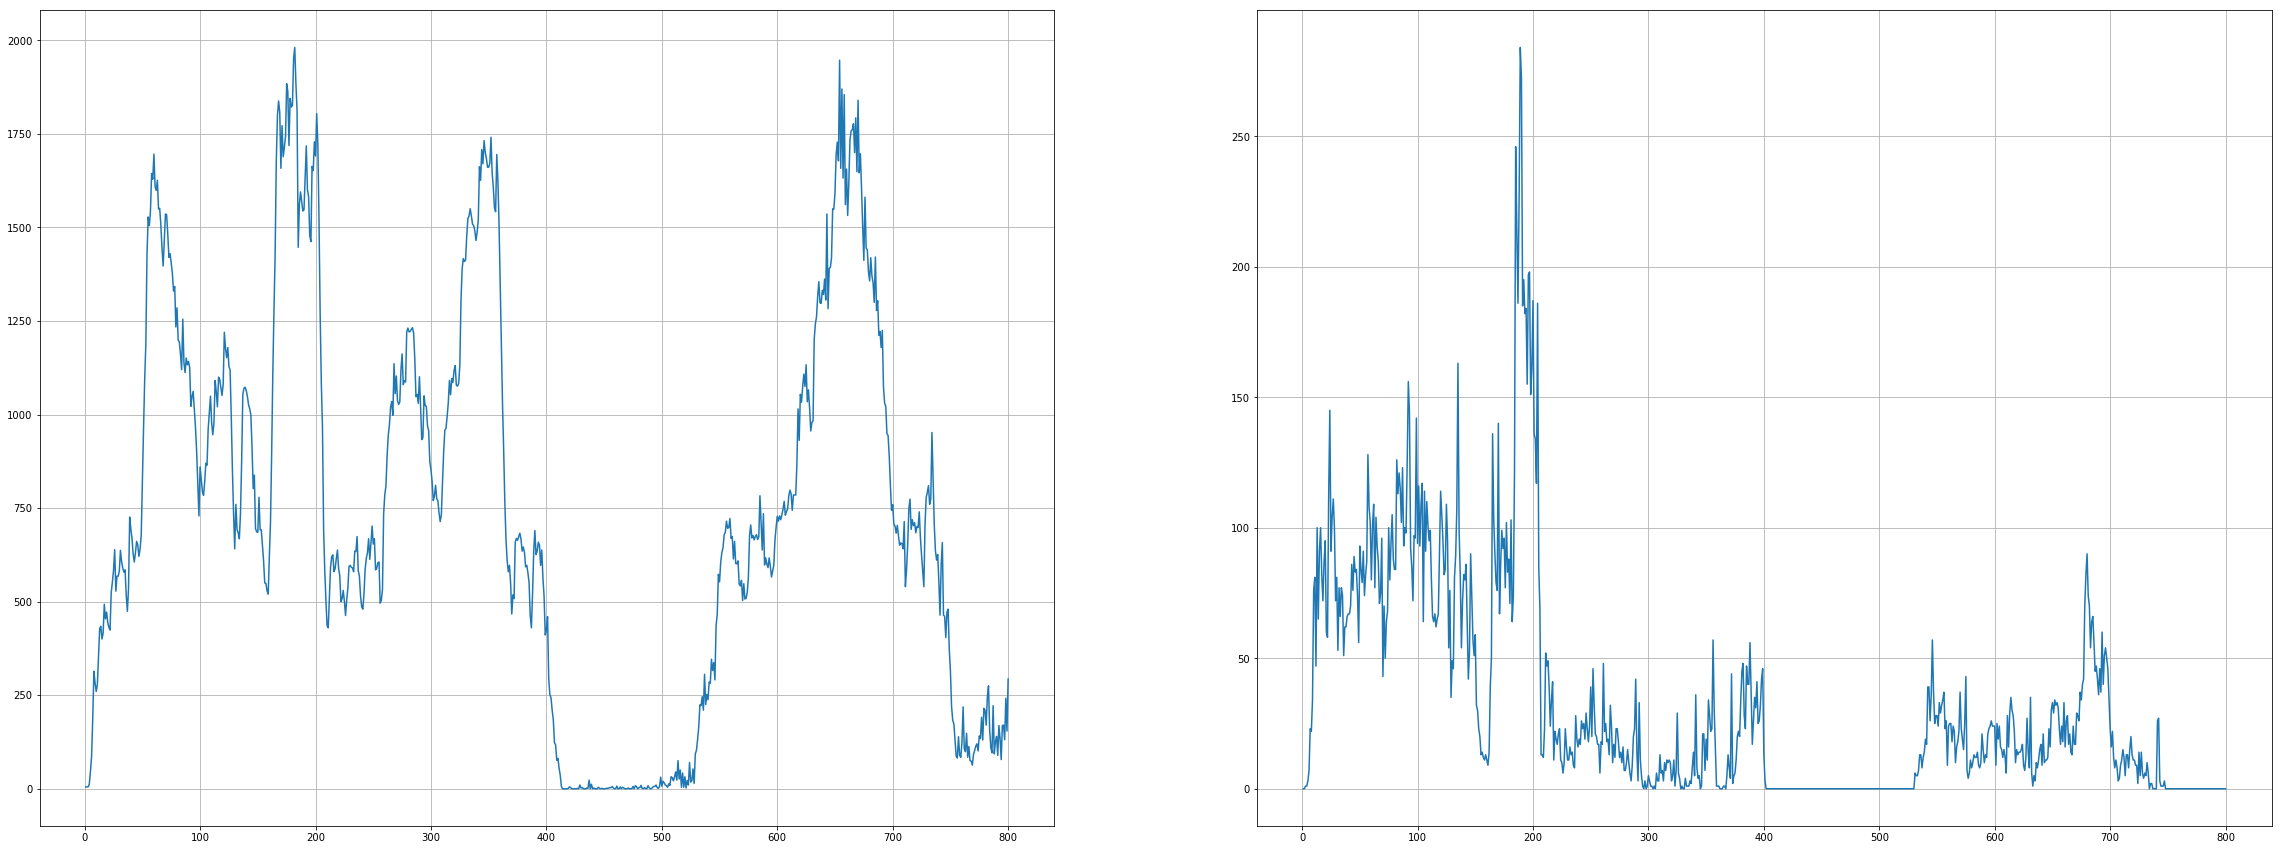

In [55]:
FN_4 = np.bitwise_and(1 - test_masks,  answers_4).sum(axis=1)
#FN
FP_4 = np.bitwise_and(test_masks,  1 - answers_4).sum(axis=1)
#FP
fig, ax = plt.subplots()

fig.set_figwidth(40)
fig.set_figheight(15)
  
plt.subplot(1, 2, 1)
plt.grid(True)

plt.plot(range(1, 801), FN_4)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.plot(range(1, 801), FP_4)

In [58]:
answer_images_4 = answers_4.reshape(800, 240, 360)

In [59]:
images_with_masks_4 = []
for i in range(800):
    images_with_masks_4.append(visualization.highlight_mask(image=test_data[i], mask=answer_images_4[i]))

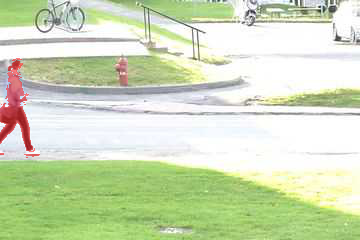

In [60]:
Image.fromarray(images_with_masks_4[14])

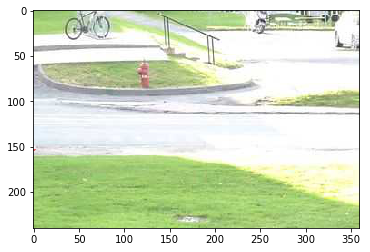

In [61]:
video_4 = visualization.make_video(frames=np.array(test_data), masks=np.array(answer_images_4))

In [63]:
#video_4()

In [230]:
#np.array(densities_4).T.shape

In [231]:
#(1 - test_masks[i].astype(bool).ravel()).shape

In [232]:
#roc_curves_4 = []
#for i in range(800):
#    y_true = 1 - test_masks[i].astype(bool).ravel()
#    if y_true.all():
#        y_true[-1] = False
#    elif not y_true.any():
#        y_true[-1] = True
#    
#    roc_curves_4.append(roc_curve(y_true=y_true, 
#                                      y_score=np.array(densities_4).T[i]))
#    if i % 100 == 0:
#        print(i)

In [164]:
#with open('roc_curves_4.pickle', 'wb') as f:
    #pickle.dump(roc_curves_4, f)

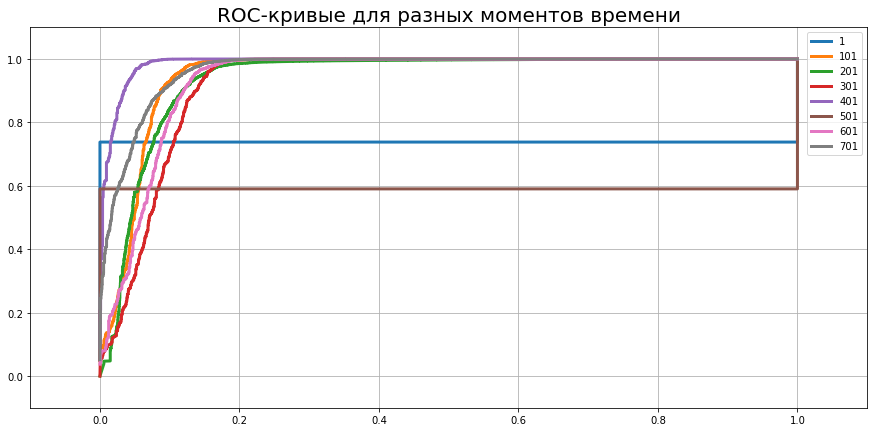

In [505]:
fig, ax = plt.subplots()

fig.set_figwidth(15)
fig.set_figheight(7)

for i in range(1, 800, 100):
    #plt.subplot(4, 2, i // 100 + 1)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-0.1, 1.1)
    plt.grid(True)
    plt.plot(roc_curves_4[i][0], roc_curves_4[i][1], linewidth=3)
plt.legend(range(1, 800, 100), fontsize=10)
plt.title('ROC-кривые для разных моментов времени', fontsize=20)
plt.savefig('exp4_roc.pdf', bbox_inches='tight')



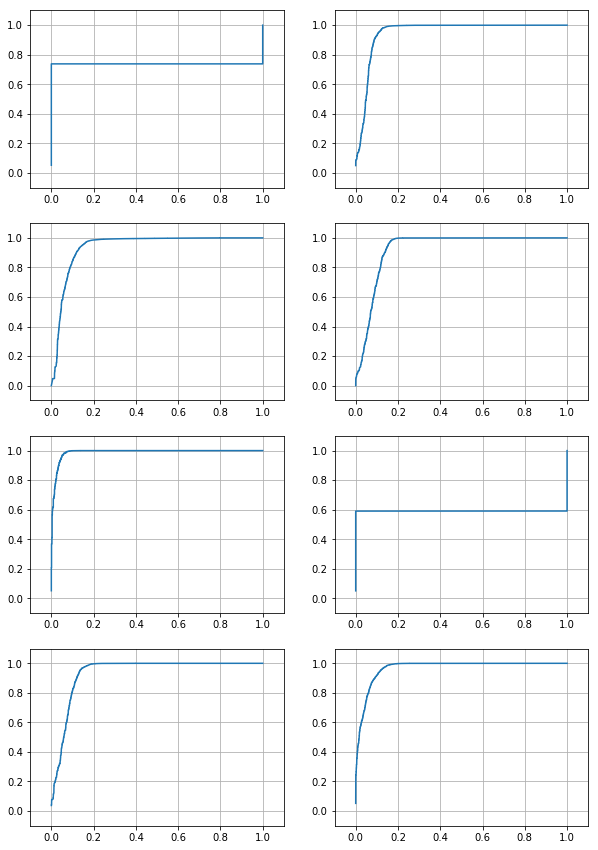

In [165]:
fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(15)

for i in range(1, 800, 100):
    plt.subplot(4, 2, i // 100 + 1)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-0.1, 1.1)
    plt.grid(True)
    plt.plot(roc_curves_4[i][0], roc_curves_4[i][1])

In [233]:
#roc_aucs_4 = []
#for i in range(800):
#    y_true = 1 - test_masks[i].astype(bool).ravel()
#    if y_true.all():
#        y_true[-1] = False
#    elif not y_true.any():
#        y_true[-1] = True
#    
#    roc_aucs_4.append(roc_auc_score(y_true=y_true, 
#                                      y_score=np.array(densities_4).T[i]))
#    if i % 100 == 0:
#        print(i)

In [167]:
#with open('roc_aucs_4.pickle', 'wb') as f:
    #pickle.dump(roc_aucs_4, f)

In [194]:
np.arange(len(roc_aucs_4))[np.array(roc_aucs_4) < 0.4]

array([776, 778, 780, 781, 799])

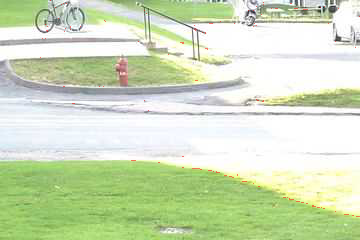

In [171]:
Image.fromarray(images_with_masks_4[776])

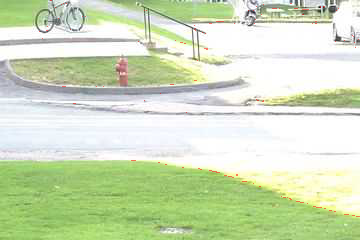

In [172]:
Image.fromarray(images_with_masks_4[778])

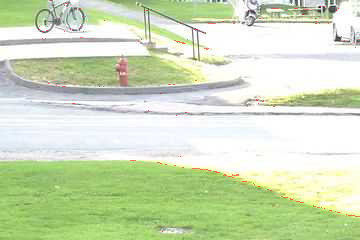

In [173]:
Image.fromarray(images_with_masks_4[799])

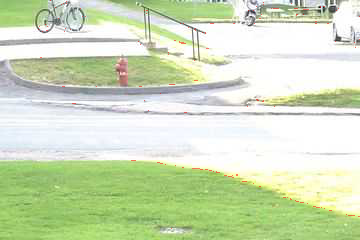

In [175]:
Image.fromarray(images_with_masks_4[781])

209 781
0.989921132909 [0.37998124978298359]


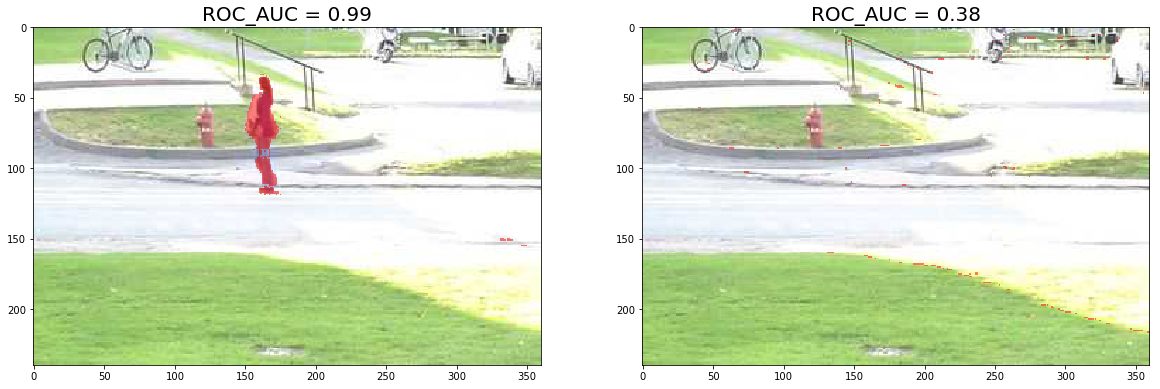

In [510]:
i, j = np.argmax(np.array(roc_aucs_4)), np.argmin(np.array(roc_aucs_4))
print(i, j)
print(roc_aucs_4[i], [roc_aucs_4[j]])
fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(7)

plt.subplot(1, 2, 1)
plt.title('ROC_AUC = 0.99', fontsize=20)
plt.imshow(Image.fromarray(images_with_masks_4[i]))

plt.subplot(1, 2, 2)
plt.title('ROC_AUC = 0.38', fontsize=20)
plt.imshow(Image.fromarray(images_with_masks_4[j]))

plt.savefig('exp4_good_and_bad.pdf', bbox_inches='tight')


# 5. 
Запустить алгоритм разделения смеси 3 трёхмерных гауссиан для вычитания фона в последовательности traffic. Проанализировать ошибки метода и сравнить результат с использованием одной гауссианы.
Замечание. Поскольку разделение смеси гауссиан на реальных данных вычислительно затратно, пред- лагается сначала отладить алгоритм на синтетических данных. Сгенерируйте выборку из смеси гауссиан и попробуйте восстановить её параметры с помощью ЕМ-алгоритма. Постройте график изменения лога- рифма правдоподобия, убедитесь в его монотонном росте.

In [214]:
data = np.concatenate((multivariate_normal([20, 20], [[20, 1], [1, 2]], 200),
                      multivariate_normal([42, 200], [[20, 12], [12, 60]], 200),
                      multivariate_normal([0, 200], [[10, 2], [2, 10]], 200)))


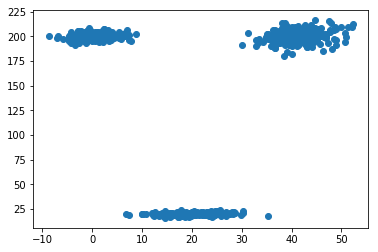

In [215]:
plt.scatter(data[:, 0], data[:, 1])

In [216]:
model = MixtureModel(n_components=3)

In [237]:
np.random.shuffle(data)
#res = model.EM_with_different_initials(max_iter=100, data=data, n_starts=100)
res = model.EM_fit(data=data, trace=True)

In [234]:
#res

In [239]:
labels = model.predict(data=data)

In [235]:
#labels

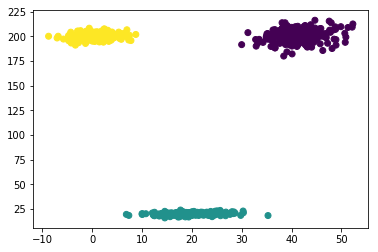

In [241]:
plt.scatter(data[:, 0], data[:, 1], c=labels)

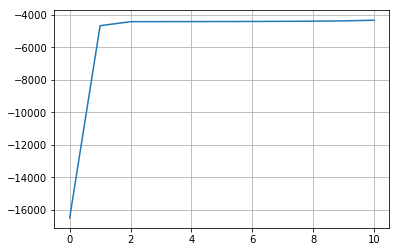

In [244]:
plt.grid(True)
plt.plot(range(len(res[3])), res[3])

In [245]:
train_data_rgb = np.array(train_data).reshape(299, -1, 3)

In [247]:
model_rgb_3_comps = MixtureModel(n_components=3)

In [236]:
#start_time = timeit.default_timer()
     
#res_weights = np.empty((86400, 3))
#res_means = np.empty((86400, 3, 3))
#res_covs = np.empty((86400, 3, 3 ,3))
#for pixel in range(86400):
#    if pixel % 10000 == 0:
#        print(pixel)
#    tmp_weights, tmp_mean, tmp_conv = model_rgb_3_comps.EM_with_different_initials(data=train_data_rgb[:, pixel], n_starts=2)
#    res_weights[pixel] = tmp_weights
#    res_means[pixel] = tmp_mean
#    res_covs[pixel] = tmp_conv
#print(timeit.default_timer() - start_time)

In [249]:
'''
with open('exp_5_res_weights.pickle', 'wb') as f:
    pickle.dump(res_weights, f)
with open('exp_5_res_means.pickle', 'wb') as f:
    pickle.dump(res_means, f)
with open('exp_5_res_covs.pickle', 'wb') as f:
    pickle.dump(res_covs, f)
'''

In [64]:
with open('exp_5_res_weights.pickle', 'rb') as f:
    res_weights = pickle.load(f)
with open('exp_5_res_means.pickle', 'rb') as f:
    res_means = pickle.load(f)
with open('exp_5_res_covs.pickle', 'rb') as f:
    res_covs = pickle.load(f)

In [65]:
res_weights.shape

(86400, 3)

In [66]:
res_means.shape

(86400, 3, 3)

In [67]:
res_covs.shape

(86400, 3, 3, 3)

In [68]:
test_data_rgb = np.array(test_data).reshape(800, -1, 3)

In [69]:
test_data_rgb.shape

(800, 86400, 3)

In [70]:
densities = []
for i in range(86400):
    tmp = np.zeros(800)
    for j in range(3):
        tmp += res_weights[i, j] * mn.pdf(x=test_data_rgb[:, i], mean=res_means[i][j], cov=res_covs[i][j])
    densities.append(tmp)

In [89]:
'''
train_densities = []
for i in range(86400):
    tmp = np.zeros(299)
    for j in range(3):
        tmp += res_weights[i, j] * mn.pdf(x=train_data_rgb[:, i], mean=res_means[i][j], cov=res_covs[i][j])
    train_densities.append(tmp)
'''

In [71]:
answers_5 = (np.array(densities).T < 1e-14)

In [72]:
FN_5 = np.bitwise_and(1 - test_masks,  answers_5).sum(axis=1)
#FN
FP_5 = np.bitwise_and(test_masks,  1 - answers_5).sum(axis=1)
#FP

In [499]:
answers_5 = (np.array(densities).T < 1e-12)

FN_5 = np.bitwise_and(1 - test_masks,  answers_5).sum(axis=1)
#FN
FP_5 = np.bitwise_and(test_masks,  1 - answers_5).sum(axis=1)

answers_5_1 = (np.array(densities).T < 1e-8)

FN_5_1 = np.bitwise_and(1 - test_masks,  answers_5_1).sum(axis=1)
#FN
FP_5_1 = np.bitwise_and(test_masks,  1 - answers_5_1).sum(axis=1)


answers_5_5 = (np.array(densities).T < 1e-20)

FN_5_5 = np.bitwise_and(1 - test_masks,  answers_5_5).sum(axis=1)
#FN
FP_5_5 = np.bitwise_and(test_masks,  1 - answers_5_5).sum(axis=1)

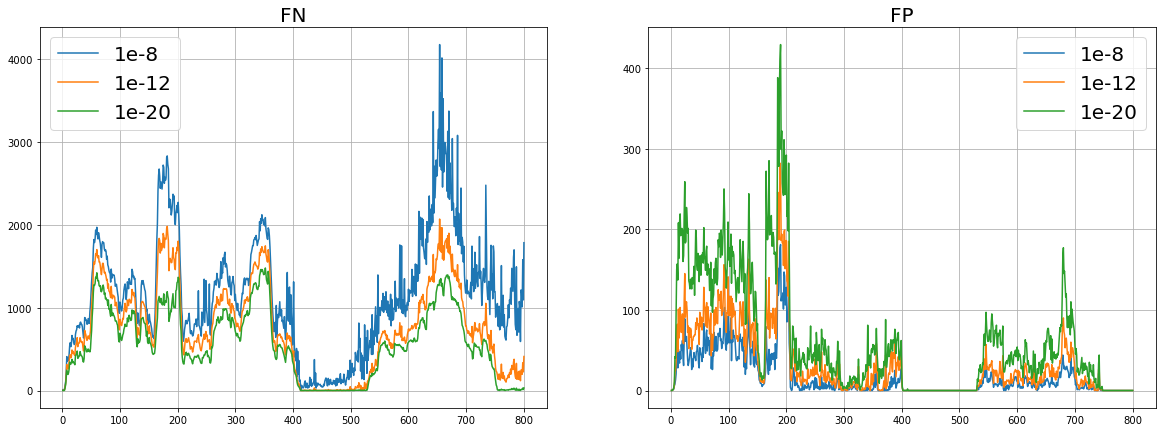

In [500]:

fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(7)
  
plt.subplot(1, 2, 1)
plt.grid(True)
plt.title("FN", fontsize=20)
plt.plot(range(1, 801), FN_5_1)
plt.plot(range(1, 801), FN_5)
plt.plot(range(1, 801), FN_5_5)
plt.legend(['1e-8', '1e-12', '1e-20'], fontsize=20)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.title("FP", fontsize=20)
plt.plot(range(1, 801), FP_5_1)
plt.plot(range(1, 801), FP_5)
plt.plot(range(1, 801), FP_5_5)
plt.legend(['1e-8', '1e-12', '1e-20'], fontsize=20)

plt.savefig('exp5_FN_FP.pdf', bbox_inches='tight')


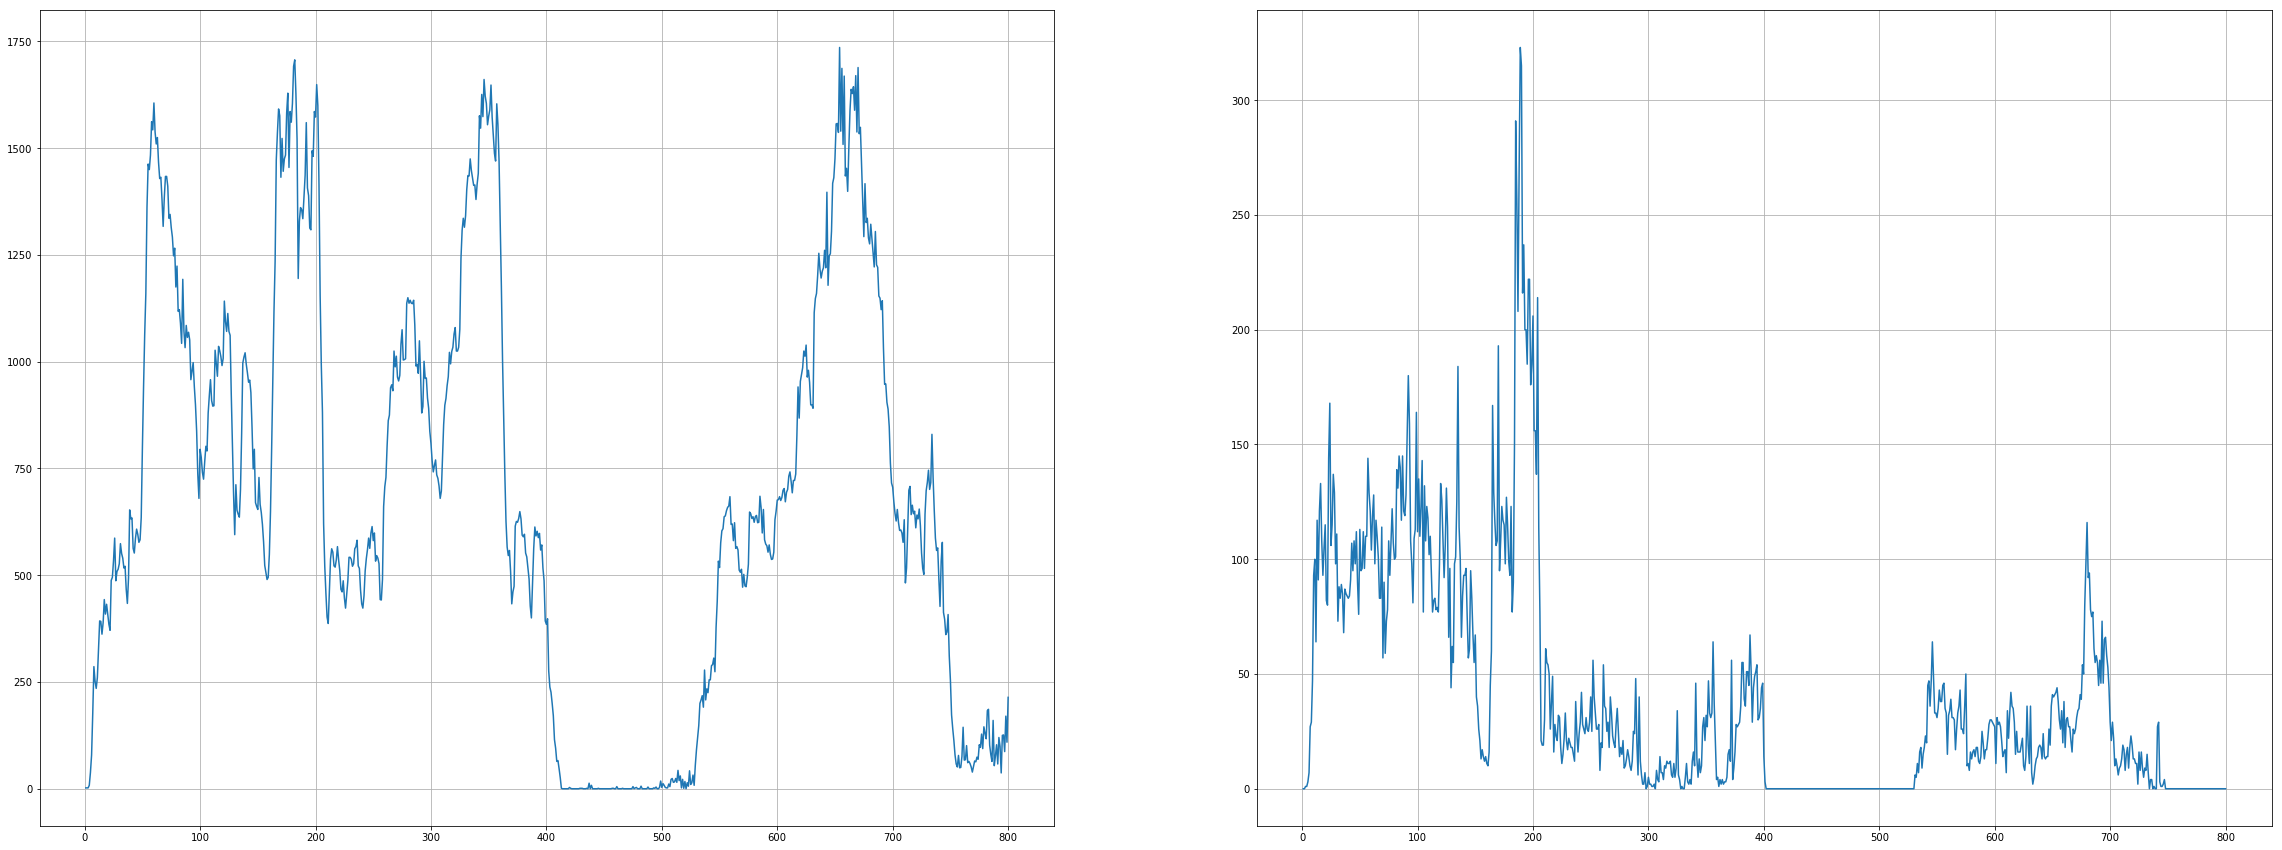

In [73]:
fig, ax = plt.subplots()

fig.set_figwidth(40)
fig.set_figheight(15)
  
plt.subplot(1, 2, 1)
plt.grid(True)

plt.plot(range(1, 801), FN_5)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.plot(range(1, 801), FP_5)

In [74]:
answer_images_5 = answers_5.reshape(800, 240, 360)

In [75]:
images_with_masks_5 = []
for i in range(800):
    images_with_masks_5.append(visualization.highlight_mask(image=test_data[i], mask=answer_images_5[i]))

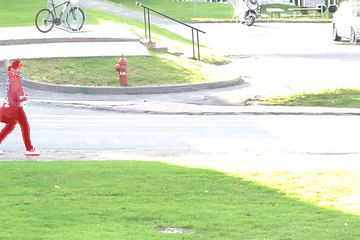

In [76]:
Image.fromarray(images_with_masks_5[14])

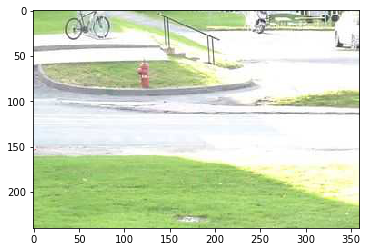

In [77]:
video_5 = visualization.make_video(frames=np.array(test_data), masks=np.array(answer_images_5))

In [79]:
#video_5()

In [239]:
#np.array(densities).T.shape

In [238]:
#(1 - test_masks[i].astype(bool).ravel()).shape

In [237]:
#roc_curves_5 = []
#for i in range(800):
#    y_true = 1 - test_masks[i].astype(bool).ravel()
#    if y_true.all():
#        y_true[-1] = False
#    elif not y_true.any():
#        y_true[-1] = True
#    
#    roc_curves_5.append(roc_curve(y_true=y_true, 
#                                      y_score=np.array(densities).T[i]))
#    if i % 100 == 0:
#        print(i)

In [179]:
#with open('roc_curves_5.pickle', 'wb') as f:
    #pickle.dump(roc_curves_5, f)

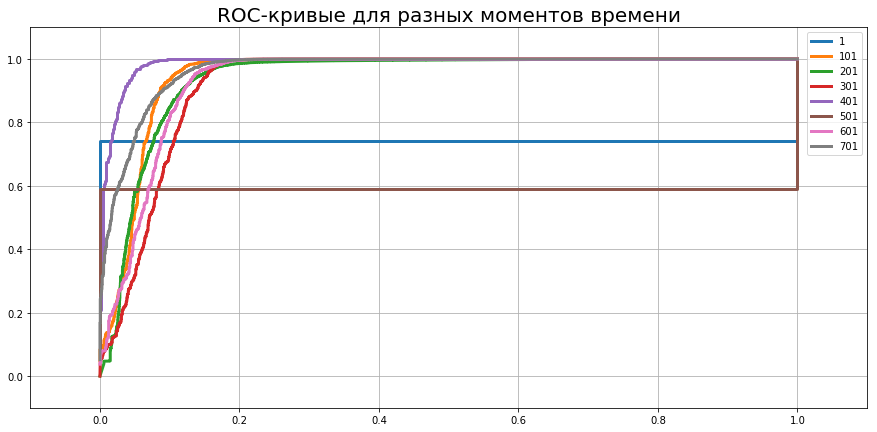

In [506]:
fig, ax = plt.subplots()

fig.set_figwidth(15)
fig.set_figheight(7)

for i in range(1, 800, 100):
    #plt.subplot(4, 2, i // 100 + 1)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-0.1, 1.1)
    plt.grid(True)
    plt.plot(roc_curves_5[i][0], roc_curves_5[i][1], linewidth=3)
plt.legend(range(1, 800, 100), fontsize=10)
plt.title('ROC-кривые для разных моментов времени', fontsize=20)
plt.savefig('exp5_roc.pdf', bbox_inches='tight')




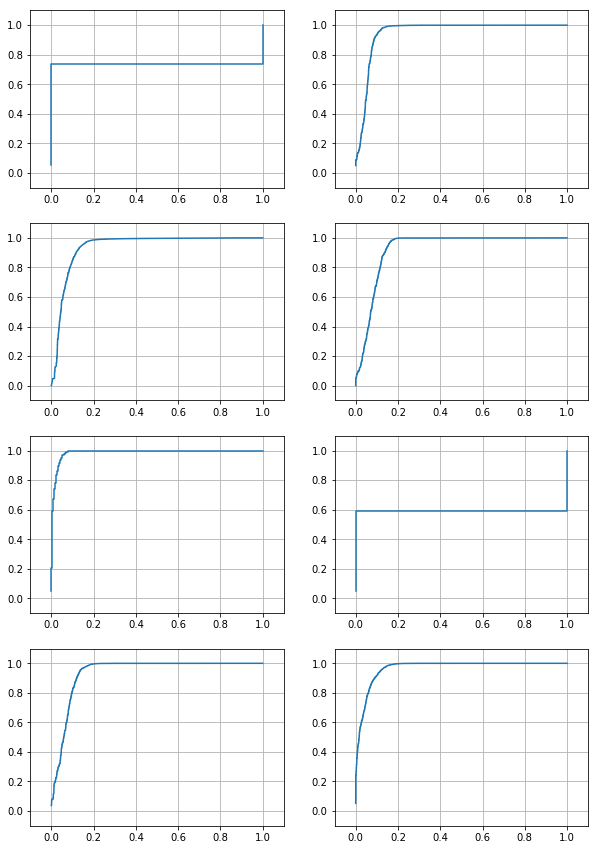

In [180]:
fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(15)

for i in range(1, 800, 100):
    plt.subplot(4, 2, i // 100 + 1)
    plt.ylim(-0.1, 1.1)
    plt.xlim(-0.1, 1.1)
    plt.grid(True)
    plt.plot(roc_curves_5[i][0], roc_curves_5[i][1])

In [240]:
#roc_aucs_5 = []
#for i in range(800):
#    y_true = 1 - test_masks[i].astype(bool).ravel()
#    if y_true.all():
#        y_true[-1] = False
#    elif not y_true.any():
#        y_true[-1] = True
#    
#    roc_aucs_5.append(roc_auc_score(y_true=y_true, 
#                                      y_score=np.array(densities).T[i]))
#    if i % 100 == 0:
#        print(i)

In [182]:
#with open('roc_aucs_5.pickle', 'wb') as f:
    #pickle.dump(roc_aucs_5, f)

In [186]:
np.arange(len(roc_aucs_5))[np.array(roc_aucs_5) < 0.4]

array([776, 778, 780, 781, 799])

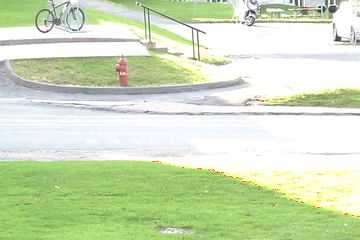

In [184]:
Image.fromarray(images_with_masks_5[776])

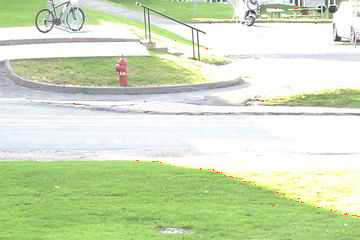

In [190]:
Image.fromarray(images_with_masks_5[778])

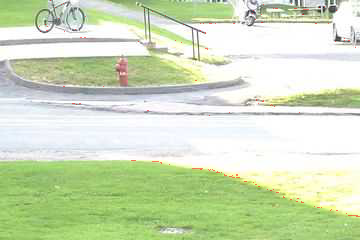

In [192]:
Image.fromarray(images_with_masks_5[799])

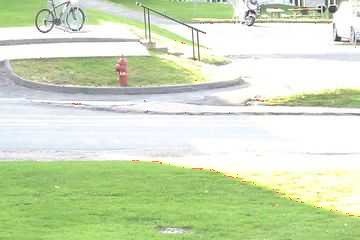

In [189]:
Image.fromarray(images_with_masks_5[781])

209 781
0.990021059983 [0.38006226923922731]


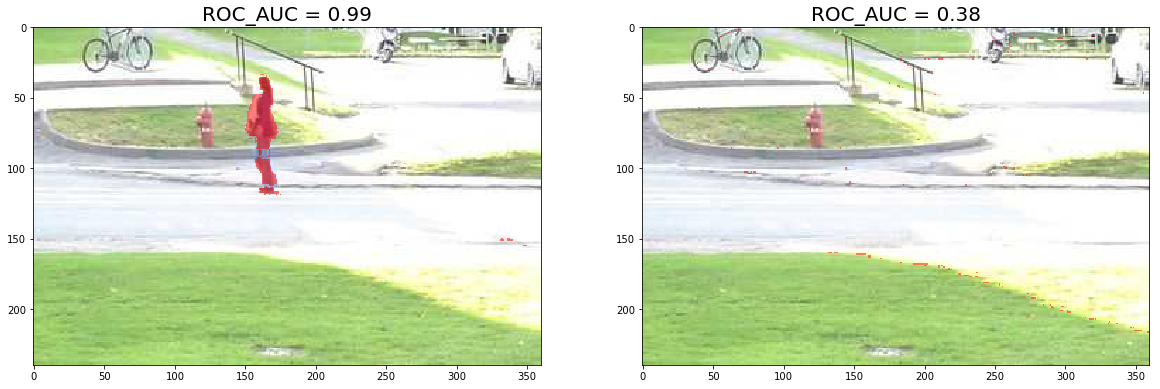

In [511]:
i, j = np.argmax(np.array(roc_aucs_5)), np.argmin(np.array(roc_aucs_5))
print(i, j)
print(roc_aucs_5[i], [roc_aucs_5[j]])
fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(7)

plt.subplot(1, 2, 1)
plt.title('ROC_AUC = 0.99', fontsize=20)
plt.imshow(Image.fromarray(images_with_masks_5[i]))

plt.subplot(1, 2, 2)
plt.title('ROC_AUC = 0.38', fontsize=20)
plt.imshow(Image.fromarray(images_with_masks_5[j]))

plt.savefig('exp5_good_and_bad.pdf', bbox_inches='tight')



# 6. 
Наилучшее из полученных решений для алгоритма вычитания фона должно быть добавлено в отчёт (или приложено отдельным файлом) в виде анимации. Формы анимации могут быть различными: виджет в IPython notebook JSAnimation, отдельный файл с видео, анимированные изображения кадров и т.д.

In [202]:
tmp_roc_aucs = np.vstack((np.array(roc_aucs_3).T, np.array(roc_aucs_4).T, np.array(roc_aucs_5).T))

In [241]:
#print(tmp_roc_aucs.T.max(axis=1))

In [242]:
#print(tmp_roc_aucs.T.argmax(axis=1))

In [213]:
800 - np.count_nonzero(tmp_roc_aucs.T.argmax(axis=1) - 2)

477

In [214]:
800 - np.count_nonzero(tmp_roc_aucs.T.argmax(axis=1) - 1)

269

In [215]:
800 - np.count_nonzero(tmp_roc_aucs.T.argmax(axis=1))

54

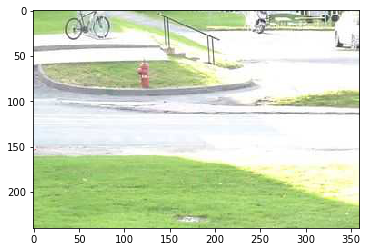

In [216]:
video_5 = visualization.make_video(frames=np.array(test_data), masks=np.array(answer_images_5))

In [515]:
#video_5()